# This is the project for Industrial Training

### ⚠️ Only works in python version upto 3.11
- **In this project we will create cat and dog classifair. After we will give it to test pic and then it will classify**

- Importing `Pathlib` Library for reding dataset file path
- Importing other neccery Libraries

### Importing Libraries

In [28]:
try:
  import numpy as np
  import pandas as pd
  import matplotlib.pyplot as plt
  import tensorflow as tf
  from tensorflow import keras
  from tensorflow.keras.preprocessing.image import ImageDataGenerator
  from pathlib import Path
  import zipfile
  import random
  import os

except Exception as e:
  print(e)
  print("Installing Libraries..........")
  !pip install numpy
  !pip install pandas
  !pip install matplotlib
  !pip install tensorflow
  !pip install scipy
  import numpy as np
  import pandas as pd
  import matplotlib.pyplot as plt
  import tensorflow as tf
  from tensorflow import keras
  from tensorflow.keras.preprocessing.image import ImageDataGenerator
  from pathlib import Path
  import zipfile
  import random
  import os

### Extract the dataset

In [30]:
# Set up paths
directory = Path(__name__).parent.absolute()  
dataset_path = directory / "Dataset" / "cats_and_dogs_filtered.zip"
extracted_path = directory / "Dataset" / "catDog"

# Check if extracted_path exists; if not, create it
if not extracted_path.exists():
    extracted_path.mkdir(parents=True, exist_ok=True)

    # Extract the zip file
    with zipfile.ZipFile(dataset_path, 'r') as zip_ref:
        zip_ref.extractall(extracted_path)
        print("Dataset extracted successfully.")
else:
    print("Dataset already extracted.")

Dataset already extracted.


In [31]:
train_dir = os.path.join(str(extracted_path), "cats_and_dogs_filtered/train/")
print(train_dir)
val_dir = os.path.join(str(extracted_path), "cats_and_dogs_filtered/validation/")

D:\Python\Python AI College\Two_week_indrustrial_traning\Project\Dataset\catDog\cats_and_dogs_filtered/train/


In [32]:
from PIL import Image
cat_dir = os.path.join(train_dir, "cats")

In [33]:
image_files = os.listdir(cat_dir)

In [34]:
print("avaiable images:", image_files[:5])

avaiable images: ['cat.0.jpg', 'cat.1.jpg', 'cat.10.jpg', 'cat.100.jpg', 'cat.101.jpg']


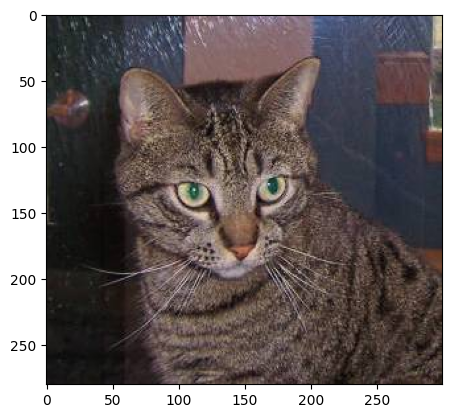

In [35]:
image_path = os.path.join(cat_dir, image_files[1])
image = Image.open(image_path)
plt.imshow(image)

In [36]:
# preprocess image

train_datagen = ImageDataGenerator(rescale=1./255, rotation_range=20, horizontal_flip=True)
val_datagen = ImageDataGenerator(rescale=1./255)

In [37]:
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(150,150),
                                                    batch_size=32,
                                                    class_mode="binary")

Found 2000 images belonging to 2 classes.


In [38]:
val_generator = val_datagen.flow_from_directory(val_dir,
                                                    target_size=(150,150),
                                                    batch_size=32,
                                                    class_mode="binary")

Found 1000 images belonging to 2 classes.


### Build Cnn Model

In [40]:
import keras

In [41]:
model = keras.Sequential([
    keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150 ,3)),
    keras.layers.MaxPooling2D(2, 2),

    keras.layers.Conv2D(64, (3,3), activation='relu'),
    keras.layers.MaxPooling2D(2, 2),

    keras.layers.Conv2D(128, (3,3), activation='relu'),
    keras.layers.MaxPooling2D(2, 2),

    keras.layers.Flatten(),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')   # binary classification

])

C:\Users\youca\anaconda3\envs\DL\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [42]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [43]:
history = model.fit(train_generator, epochs=10, validation_data=val_generator)

C:\Users\youca\anaconda3\envs\DL\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 290ms/step - accuracy: 0.5007 - loss: 0.7895

C:\Users\youca\anaconda3\envs\DL\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


63/63 ━━━━━━━━━━━━━━━━━━━━ 22s 321ms/step - accuracy: 0.5008 - loss: 0.7885 - val_accuracy: 0.4950 - val_loss: 0.6933
Epoch 2/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 20s 319ms/step - accuracy: 0.5357 - loss: 0.6906 - val_accuracy: 0.5620 - val_loss: 0.6804
Epoch 3/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 20s 317ms/step - accuracy: 0.5798 - loss: 0.6726 - val_accuracy: 0.5800 - val_loss: 0.6953
Epoch 4/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 20s 318ms/step - accuracy: 0.6360 - loss: 0.6491 - val_accuracy: 0.6530 - val_loss: 0.6257
Epoch 5/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 21s 338ms/step - accuracy: 0.6528 - loss: 0.6227 - val_accuracy: 0.6100 - val_loss: 0.6984
Epoch 6/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 22s 344ms/step - accuracy: 0.6877 - loss: 0.5935 - val_accuracy: 0.6550 - val_loss: 0.6173
Epoch 7/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 20s 325ms/step - accuracy: 0.7064 - loss: 0.5780 - val_accuracy: 0.6980 - val_loss: 0.5880
Epoch 8/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 21s 334ms/step - accuracy: 0.7176 - loss: 0.5565 - val_accuracy: 0.660

### Save the Model

In [45]:
model.save("cat_dog_classifier.h5")
print("model saved successfully")

model saved successfully


In [46]:
loss, accuracy =  model.evaluate(val_generator)

32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step - accuracy: 0.7236 - loss: 0.5511


### Accuracy

In [48]:
print(f' validation Accuracy :{accuracy *100:.2f}%')

 validation Accuracy :71.50%
